### Task 1: Design an entity-relationship model for the given use case.

---
**Cardinality**

Each user has one subscription. \
Each user can watch multiple movies. \
Each user can create multiple reviews. \
Each user has one watch history list. \
Many reviews creates one favourites list. \
Each movie can have multiple actors. \

---

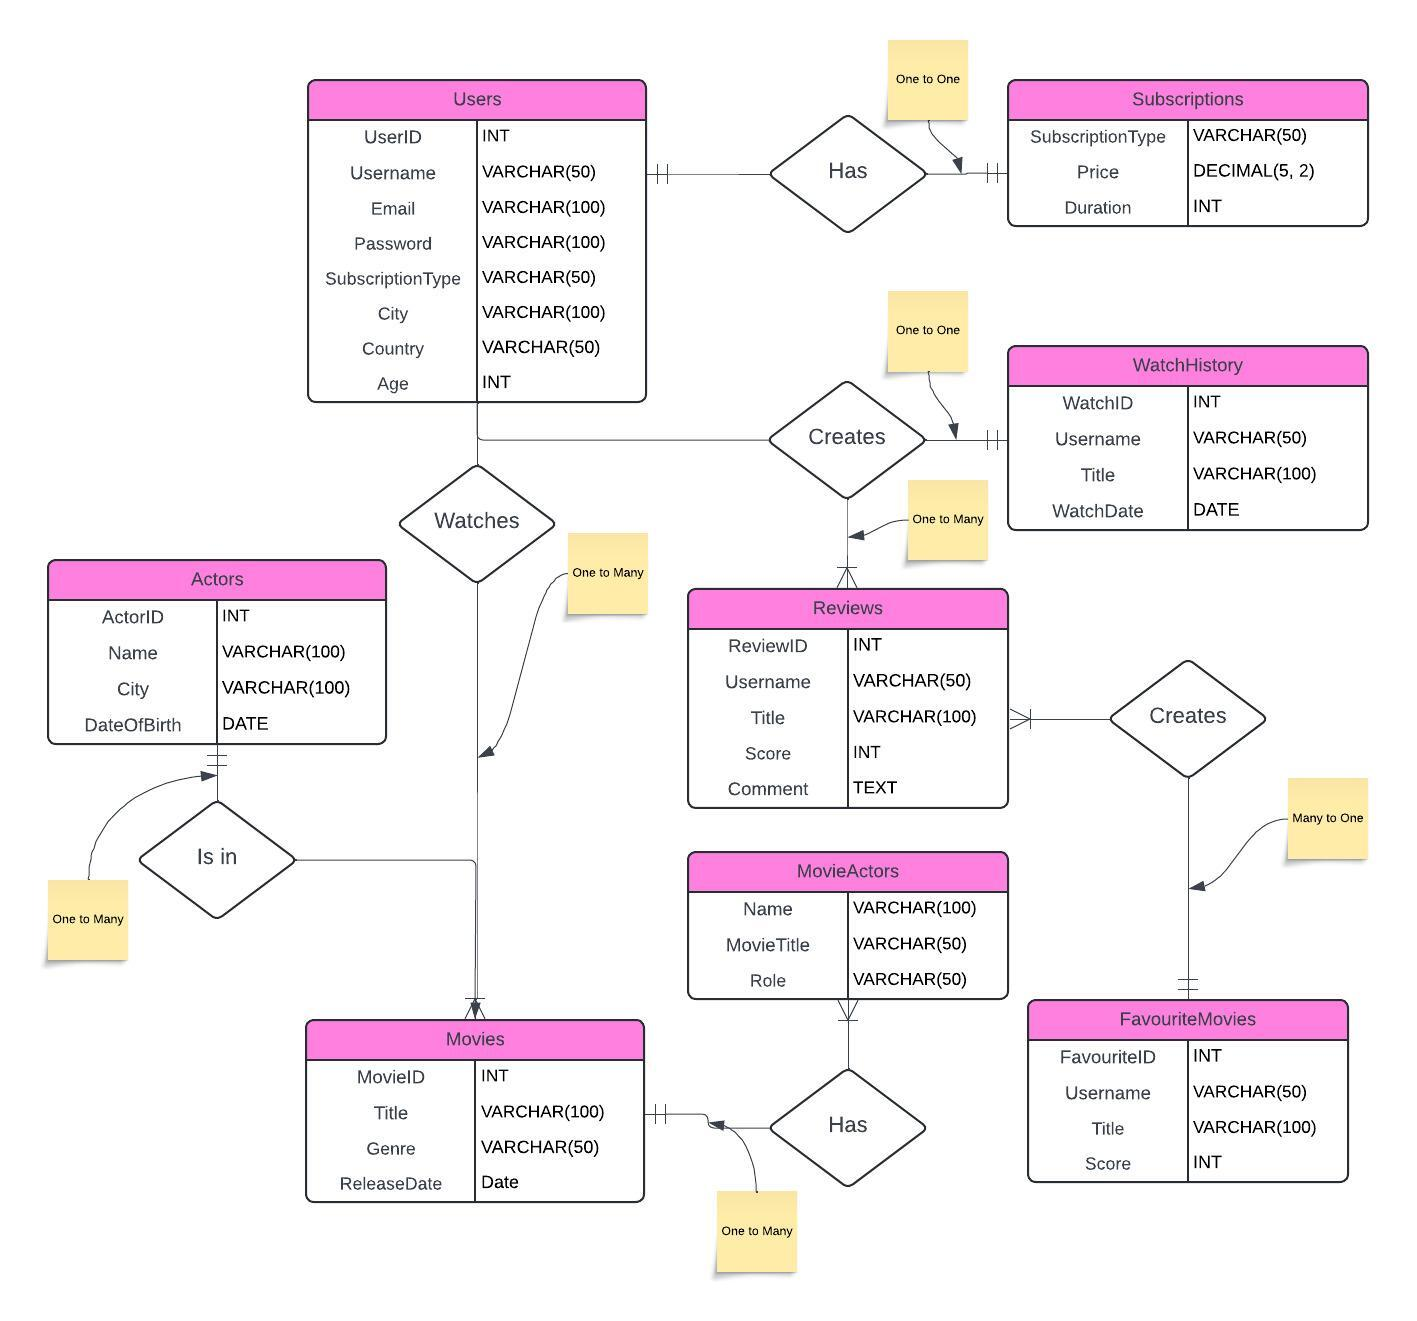

### Task 2: Provide the scripts to create the database model in SQL.

2.1 Create the Database

    CREATE DATABASE MininetDB;
    USE MininetDB;

2.2 Create the Subscriptions Table

    CREATE TABLE Subscriptions (
        SubscriptionType VARCHAR(50) PRIMARY KEY,
        Price DECIMAL(10,2),
        Duration INT
    );




2.3 Create the Users Table

    CREATE TABLE Users (
        UserID INT AUTO_INCREMENT PRIMARY KEY,
        Username VARCHAR(50) UNIQUE,
        Email VARCHAR(100) UNIQUE,
        Password VARCHAR(100),
        SubscriptionType VARCHAR(50),
        City VARCHAR(100),
        Country VARCHAR(50),
        Age INT,
        FOREIGN KEY (SubscriptionType) REFERENCES Subscriptions(SubscriptionType)
        ON DELETE RESTRICT
        ON UPDATE CASCADE
    );





2.4 Create the Actors Table

    CREATE TABLE Actors (
        ActorID INT AUTO_INCREMENT PRIMARY KEY,
        Name VARCHAR(100) UNIQUE,
        City VARCHAR(100),
        DateOfBirth DATE
    );




2.5 Create the Movies Table

    CREATE TABLE Movies (
        MovieID INT AUTO_INCREMENT PRIMARY KEY,
        Title VARCHAR(100) UNIQUE,
        Genre VARCHAR(50),
        ReleaseDate DATE
    );




2.6 Create FavoriteMovies Table

    CREATE TABLE FavoriteMovies (
        FavouriteID INT AUTO_INCREMENT PRIMARY KEY,
        Username VARCHAR(50),
        Title VARCHAR(100),
        Score INT,
        FOREIGN KEY (Username) REFERENCES Users(Username)
        ON DELETE CASCADE
        ON UPDATE CASCADE,
        FOREIGN KEY (Title) REFERENCES Movies(Title)
        ON DELETE CASCADE
        ON UPDATE CASCADE
    );




2.7 Create the Reviews Table

    CREATE TABLE Reviews (
        ReviewID INT AUTO_INCREMENT PRIMARY KEY,
        UserID INT,
        MovieID INT,
        Score INT,
        Comment TEXT,
        FOREIGN KEY (UserID) REFERENCES Users(UserID)
        ON DELETE CASCADE
        ON UPDATE CASCADE,
        FOREIGN KEY (MovieID) REFERENCES Movies(MovieID)
        ON DELETE CASCADE
        ON UPDATE CASCADE
    );



2.8 Create MovieActors Table

    CREATE TABLE MovieActors (
        MovieTitle VARCHAR(100),
        ActorName VARCHAR(100),
        Role VARCHAR(100),
        PRIMARY KEY (MovieTitle, ActorName),
        FOREIGN KEY (MovieTitle) REFERENCES Movies(Title)
        ON DELETE CASCADE
        ON UPDATE CASCADE,
        FOREIGN KEY (ActorName) REFERENCES Actors(Name)
        ON DELETE CASCADE
        ON UPDATE CASCADE
    );





### Task 3: Provide the SQL scripts for inserting data into the database tables. You should insert at least five records per table.

3.1 Insert Data into Subscriptions Table

    INSERT INTO Subscriptions (SubscriptionType, Price, Duration)
    VALUES
    ('HD', 9.99, 1),
    ('UHD', 14.99, 1),
    ('Basic', 5.99, 1),
    ('Standard', 12.99, 1),
    ('Premium', 19.99, 1);


3.2 Insert Data into Users Table

    INSERT INTO Users (Username, Email, Password, SubscriptionType, City, Country, Age)
    VALUES
    ('john_doe', 'john@example.com', 'password1', 'HD', 'New York', 'USA', 28),
    ('alice_smith', 'alice@example.com', 'password2', 'HD', 'Los Angeles', 'USA', 34),
    ('jane_doe', 'jane@example.com', 'password3', 'UHD', 'Chicago', 'USA', 21),
    ('bob_jones', 'bob@example.com', 'password4', 'UHD', 'Boston', 'USA', 30),
    ('emma_johnson', 'emma@example.com', 'password5', 'HD', 'San Francisco', 'USA', 25),
    ('michael_brown', 'michael@example.com', 'password6', 'UHD', 'Houston', 'USA', 40),
    ('susan_clark', 'susan@example.com', 'password7', 'HD', 'Seattle', 'USA', 27),
    ('david_wilson', 'david@example.com', 'password8', 'HD', 'Austin', 'USA', 32),
    ('linda_martin', 'linda@example.com', 'password9', 'UHD', 'Denver', 'USA', 29),
    ('robert_white', 'robert@example.com', 'password10', 'HD', 'San Diego', 'USA', 35);


3.3 Insert data into Actors Table

    INSERT INTO Actors (Name, City, DateOfBirth)
    VALUES
    ('Millie Bobby Brown', 'Los Angeles', '2004-02-19'),
    ('Bryan Cranston', 'Hollywood', '1956-03-07'),
    ('Winona Ryder', 'New York', '1971-10-29'),
    ('Aaron Paul', 'Boise', '1979-08-27'),
    ('David Harbour', 'White Plains', '1975-04-10'),
    ('Emma Watson', 'Paris', '1990-04-15'),
    ('Leonardo DiCaprio', 'Los Angeles', '1974-11-11'),
    ('Scarlett Johansson', 'New York', '1984-11-22'),
    ('Tom Hanks', 'Concord', '1956-07-09'),
    ('Natalie Portman', 'Jerusalem', '1981-06-09');


3.4 Insert Data into Movies Table

    INSERT INTO Movies (Title, Genre, ReleaseDate)
    VALUES
    ('Stranger Things', 'Sci-fi', '2016-07-15'),
    ('Breaking Bad', 'Drama', '2008-01-20'),
    ('The Office', 'Comedy', '2005-03-24'),
    ('Parks and Recreation', 'Comedy', '2009-04-09'),
    ('The Godfather', 'Crime', '1972-03-24'),
    ('Inception', 'Sci-fi', '2010-07-16'),
    ('The Dark Knight', 'Action', '2008-07-18'),
    ('Titanic', 'Romance', '1997-12-19'),
    ('The Avengers', 'Action', '2012-05-04'),
    ('Harry Potter', 'Fantasy', '2001-11-16');


3.5 Insert data into FavouriteMovies table

    INSERT INTO FavoriteMovies (Username, Title, Score)
    VALUES
    ('john_doe', 'The Office', 5),
    ('john_doe', 'Parks and Recreation', 4),
    ('alice_smith', 'The Godfather', 3),
    ('jane_doe', 'Stranger Things', 5),
    ('bob_jones', 'Breaking Bad', 4),
    ('emma_johnson', 'Inception', 5),
    ('michael_brown', 'The Dark Knight', 4),
    ('susan_clark', 'Titanic', 3),
    ('david_wilson', 'The Avengers', 4),
    ('linda_martin', 'Harry Potter', 5);


3.6 Insert Data into Reviews Table

    INSERT INTO Reviews (UserID, MovieID, Score, Comment)
    VALUES
    ((SELECT UserID FROM Users WHERE Username = 'john_doe'), (SELECT MovieID FROM Movies WHERE Title = 'Stranger Things'), 5, 'Amazing show!'),
    ((SELECT UserID FROM Users WHERE Username = 'alice_smith'), (SELECT MovieID FROM Movies WHERE Title = 'Breaking Bad'), 3, 'Good show'),
    ((SELECT UserID FROM Users WHERE Username = 'jane_doe'), (SELECT MovieID FROM Movies WHERE Title = 'The Office'), 4, 'Funny and smart'),
    ((SELECT UserID FROM Users WHERE Username = 'bob_jones'), (SELECT MovieID FROM Movies WHERE Title = 'Parks and Recreation'), 2, 'Not my taste'),
    ((SELECT UserID FROM Users WHERE Username = 'emma_johnson'), (SELECT MovieID FROM Movies WHERE Title = 'The Godfather'), 5, 'A classic!'),
    ((SELECT UserID FROM Users WHERE Username = 'michael_brown'), (SELECT MovieID FROM Movies WHERE Title = 'Inception'), 5, 'Mind-blowing!'),
    ((SELECT UserID FROM Users WHERE Username = 'susan_clark'), (SELECT MovieID FROM Movies WHERE Title = 'The Dark Knight'), 4, 'Great action movie!'),
    ((SELECT UserID FROM Users WHERE Username = 'david_wilson'), (SELECT MovieID FROM Movies WHERE Title = 'Titanic'), 3, 'A bit long but good.'),
    ((SELECT UserID FROM Users WHERE Username = 'linda_martin'), (SELECT MovieID FROM Movies WHERE Title = 'The Avengers'), 4, 'Super entertaining!'),
    ((SELECT UserID FROM Users WHERE Username = 'robert_white'), (SELECT MovieID FROM Movies WHERE Title = 'Harry Potter'), 5, 'Magical!');


3.7 Insert data into MovieActors table

    INSERT INTO MovieActors (MovieTitle, ActorName, Role)
    VALUES
    ('Stranger Things', 'Millie Bobby Brown', 'Eleven'),
    ('Breaking Bad', 'Bryan Cranston', 'Walter White'),
    ('Stranger Things', 'Winona Ryder', 'Joyce Byers'),
    ('Breaking Bad', 'Aaron Paul', 'Jesse Pinkman'),
    ('Stranger Things', 'David Harbour', 'Jim Hopper'),
    ('Inception', 'Leonardo DiCaprio', 'Cobb'),
    ('Titanic', 'Leonardo DiCaprio', 'Jack Dawson'),
    ('The Avengers', 'Scarlett Johansson', 'Black Widow'),
    ('The Dark Knight', 'Tom Hanks', 'Batman'),
    ('Harry Potter', 'Emma Watson', 'Hermione Granger');


### Task 4: Create queries for extracting data.

4.1 Export all data about users in the HD subscriptions.

    SELECT *
    FROM Users
    WHERE SubscriptionType = 'HD';

    +--------+--------------+--------------------+------------+------------------+---------------+---------+------+
    | UserID | Username     | Email              | Password   | SubscriptionType | City          | Country | Age  |
    +--------+--------------+--------------------+------------+------------------+---------------+---------+------+
    |      1 | john_doe     | john@example.com   | password1  | HD               | New York      | USA     |   28 |
    |      2 | alice_smith  | alice@example.com  | password2  | HD               | Los Angeles   | USA     |   34 |
    |      5 | emma_johnson | emma@example.com   | password5  | HD               | San Francisco | USA     |   25 |
    |      7 | susan_clark  | susan@example.com  | password7  | HD               | Seattle       | USA     |   27 |
    |      8 | david_wilson | david@example.com  | password8  | HD               | Austin        | USA     |   32 |
    |     10 | robert_white | robert@example.com | password10 | HD               | San Diego     | USA     |   35 |
    +--------+--------------+--------------------+------------+------------------+---------------+---------+------+
    6 rows in set (0.11 sec)


4.2 Export all data about actors and their associated movies.


    SELECT
        A.ActorID,
        A.Name AS ActorName,
        A.City,
        A.DateOfBirth,
        M.MovieID,
        M.Title AS MovieTitle,
        M.Genre,
        M.ReleaseDate
    FROM
        Actors A
    JOIN
        MovieActors MA ON A.Name = MA.ActorName
    JOIN
        Movies M ON MA.MovieTitle = M.Title;

    +---------+--------------------+--------------+-------------+---------+-----------------+---------+-------------+
    | ActorID | ActorName          | City         | DateOfBirth | MovieID | MovieTitle      | Genre   | ReleaseDate |
    +---------+--------------------+--------------+-------------+---------+-----------------+---------+-------------+
    |       1 | Millie Bobby Brown | Los Angeles  | 2004-02-19  |       1 | Stranger Things | Sci-fi  | 2016-07-15  |
    |       2 | Bryan Cranston     | Hollywood    | 1956-03-07  |       2 | Breaking Bad    | Drama   | 2008-01-20  |
    |       3 | Winona Ryder       | New York     | 1971-10-29  |       1 | Stranger Things | Sci-fi  | 2016-07-15  |
    |       4 | Aaron Paul         | Boise        | 1979-08-27  |       2 | Breaking Bad    | Drama   | 2008-01-20  |
    |       5 | David Harbour      | White Plains | 1975-04-10  |       1 | Stranger Things | Sci-fi  | 2016-07-15  |
    |       6 | Emma Watson        | Paris        | 1990-04-15  |      10 | Harry Potter    | Fantasy | 2001-11-16  |
    |       7 | Leonardo DiCaprio  | Los Angeles  | 1974-11-11  |       6 | Inception       | Sci-fi  | 2010-07-16  |
    |       7 | Leonardo DiCaprio  | Los Angeles  | 1974-11-11  |       8 | Titanic         | Romance | 1997-12-19  |
    |       8 | Scarlett Johansson | New York     | 1984-11-22  |       9 | The Avengers    | Action  | 2012-05-04  |
    |       9 | Tom Hanks          | Concord      | 1956-07-09  |       7 | The Dark Knight | Action  | 2008-07-18  |
    +---------+--------------------+--------------+-------------+---------+-----------------+---------+-------------+
    10 rows in set (0.10 sec)

    







4.3 Export all data to group actors from a specific city, showing also the average age (per city).


    SELECT City, COUNT(*) AS NumberOfActors, AVG(YEAR(CURDATE()) - YEAR(DateOfBirth) - (RIGHT(CURDATE(), 5) < RIGHT(DateOfBirth, 5))) AS AvgAge
    FROM Actors
    GROUP BY City;

    +--------------+----------------+---------+
    | City         | NumberOfActors | AvgAge  |
    +--------------+----------------+---------+
    | Los Angeles  |              2 | 34.5000 |
    | Hollywood    |              1 | 68.0000 |
    | New York     |              2 | 45.5000 |
    | Boise        |              1 | 44.0000 |
    | White Plains |              1 | 49.0000 |
    | Paris        |              1 | 34.0000 |
    | Concord      |              1 | 68.0000 |
    | Jerusalem    |              1 | 43.0000 |
    +--------------+----------------+---------+
    8 rows in set (0.10 sec)


4.4 Export all data to show the favourite comedy movies for a specific user.

    SELECT
        U.Username,
        M.Title AS FavoriteComedy,
        R.Score
    FROM
        Users U
    JOIN
        Reviews R ON U.UserID = R.UserID
    JOIN
        Movies M ON R.MovieID = M.MovieID
    WHERE
        U.Username = 'jane_doe'
        AND M.Genre = 'Comedy'
    ORDER BY
        R.Score DESC;

    +----------+----------------+-------+
    | Username | FavoriteComedy | Score |
    +----------+----------------+-------+
    | jane_doe | The Office     |     4 |
    +----------+----------------+-------+
    1 row in set (0.10 sec)




    




4.5 Export all data to count how many subscriptions are in the database per country.

    SELECT Country, COUNT(*) AS SubscriptionCount
    FROM Users
    GROUP BY Country;

    +---------+-------------------+
    | Country | SubscriptionCount |
    +---------+-------------------+
    | USA     |                10 |
    +---------+-------------------+
    1 row in set (0.11 sec)

4.6 Export all data to find the movies that start with the keyword 'The'.

    SELECT *
    FROM Movies
    WHERE Title LIKE 'The%';

    +---------+-----------------+--------+-------------+
    | MovieID | Title           | Genre  | ReleaseDate |
    +---------+-----------------+--------+-------------+
    |       9 | The Avengers    | Action | 2012-05-04  |
    |       7 | The Dark Knight | Action | 2008-07-18  |
    |       5 | The Godfather   | Crime  | 1972-03-24  |
    |       3 | The Office      | Comedy | 2005-03-24  |
    +---------+-----------------+--------+-------------+
    4 rows in set (0.11 sec)


4.7 Export data to find the number of subscriptions per movie category.

    SELECT
        M.Genre,
        COUNT(DISTINCT U.UserID) AS SubscriptionCount
    FROM
        Movies M
    JOIN
        Reviews R ON M.MovieID = R.MovieID
    JOIN
        Users U ON R.UserID = U.UserID
    GROUP BY
        M.Genre;

    +---------+-------------------+
    | Genre   | SubscriptionCount |
    +---------+-------------------+
    | Action  |                 2 |
    | Comedy  |                 2 |
    | Crime   |                 1 |
    | Drama   |                 1 |
    | Fantasy |                 1 |
    | Romance |                 1 |
    | Sci-fi  |                 2 |
    +---------+-------------------+
    7 rows in set (0.11 sec)


4.8 Export data to find the username and the city of the youngest customer in the UHD subscription category.

    SELECT UserName, City
    FROM Users
    WHERE SubscriptionType = 'UHD'
    ORDER BY Age ASC
    LIMIT 1;

    +----------+---------+
    | UserName | City    |
    +----------+---------+
    | jane_doe | Chicago |
    +----------+---------+
    1 row in set (0.10 sec)


4.9 Export data to find users between 22 - 30 years old (including 22 and 30 ).

    SELECT *
    FROM Users
    WHERE Age BETWEEN 22 AND 30;

    +--------+--------------+-------------------+-----------+------------------+---------------+---------+------+
    | UserID | Username     | Email             | Password  | SubscriptionType | City          | Country | Age  |
    +--------+--------------+-------------------+-----------+------------------+---------------+---------+------+
    |      1 | john_doe     | john@example.com  | password1 | HD               | New York      | USA     |   28 |
    |      4 | bob_jones    | bob@example.com   | password4 | UHD              | Boston        | USA     |   30 |
    |      5 | emma_johnson | emma@example.com  | password5 | HD               | San Francisco | USA     |   25 |
    |      7 | susan_clark  | susan@example.com | password7 | HD               | Seattle       | USA     |   27 |
    |      9 | linda_martin | linda@example.com | password9 | UHD              | Denver        | USA     |   29 |
    +--------+--------------+-------------------+-----------+------------------+---------------+---------+------+
    5 rows in set (0.11 sec)



4.10 Export data to find the average age of users with low score reviews (less than 3). Group your data for users under 20, 21-40, and 41 and over.

    SELECT
      CASE
        WHEN Age < 20 THEN 'Under 20'
        WHEN Age BETWEEN 21 AND 40 THEN '21-40'
        ELSE '41 and over'
      END AS AgeGroup,
      AVG(Age) AS AverageAge
    FROM
        Users U
    JOIN
        Reviews R ON U.UserID = R.UserID
    WHERE
        R.Score < 3
    GROUP BY
        AgeGroup;

    +----------+------------+
    | AgeGroup | AverageAge |
    +----------+------------+
    | 21-40    |    30.0000 |
    +----------+------------+
    1 row in set (0.11 sec)

### Task 5: Provide Python scripts to run the Task 4 queries 1-5.

In [ ]:
# install connector
!pip install mysql-connector-python

# import relevant libraries and modules
import mysql.connector
from mysql.connector import Error

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 54.6 MB/s eta 0:00:00


In [ ]:
# connect to server

def create_server_connection(host_name, user_name, user_password):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection


# IP adress and details
host = "34.133.212.28"
user = "root"
password = "jb1994"

connection = create_server_connection(host, user, password)

MySQL Database connection successful


In [ ]:
# Connect to database

def create_db_connection(host_name, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            database=db_name
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection

host = "34.133.212.28"
user = "root"
password = "jb1994"
database = "MininetDB"

connection = create_db_connection(host, user, password, database)

MySQL Database connection successful


In [ ]:
# run sql command to ensure we're using correct Database

cursor = connection.cursor()
cursor.execute("USE MininetDB;")

In [ ]:
# create function to execute queries.

def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query successful")
    except Error as err:
        print(f"Error: '{err}'")

In [ ]:
# test the above function works by displaying databases

cursor = connection.cursor()
cursor.execute("SHOW DATABASES;")
for (databases) in cursor:
     print(databases[0])

MininetDB
information_schema
mysql
performance_schema
sys


In [ ]:
# 5.1 Export all data about users in the HD subscriptions

input = input("Enter the subscription type: ")

if input == "HD":
    query = f"SELECT * FROM Users WHERE SubscriptionType = 'HD';"
elif input == "UHD":
    query = f"SELECT * FROM Users WHERE SubscriptionType = 'UHD';"
else:
    print("Invalid input. Please enter 'HD' or 'UHD'.")

cursor.execute(query)
results = cursor.fetchall()

for result in results:
  print(result)

Enter the subscription type: HD
(1, 'john_doe', 'john@example.com', 'password1', 'HD', 'New York', 'USA', 28)
(2, 'alice_smith', 'alice@example.com', 'password2', 'HD', 'Los Angeles', 'USA', 34)
(5, 'emma_johnson', 'emma@example.com', 'password5', 'HD', 'San Francisco', 'USA', 25)


In [ ]:
# 5.2 Export all data about actors and their associated movies.

query = """
    SELECT
        A.ActorID,
        A.Name AS ActorName,
        A.City,
        A.DateOfBirth,
        M.MovieID,
        M.Title AS MovieTitle,
        M.Genre,
        M.ReleaseDate
    FROM
        Actors A
    JOIN
        MovieActors MA ON A.Name = MA.ActorName
    JOIN
        Movies M ON MA.MovieTitle = M.Title;
        """

cursor.execute(query)
results = cursor.fetchall()

for result in results:
  print(result)

(5, 'David Harbour', 'White Plains', datetime.date(1975, 4, 10), 1, 'Stranger Things', 'Sci-fi', datetime.date(2016, 7, 15))
(3, 'Winona Ryder', 'New York', datetime.date(1971, 10, 29), 1, 'Stranger Things', 'Sci-fi', datetime.date(2016, 7, 15))
(1, 'Millie Bobby Brown', 'Los Angeles', datetime.date(2004, 2, 19), 1, 'Stranger Things', 'Sci-fi', datetime.date(2016, 7, 15))
(4, 'Aaron Paul', 'Boise', datetime.date(1979, 8, 27), 2, 'Breaking Bad', 'Drama', datetime.date(2008, 1, 20))
(2, 'Bryan Cranston', 'Hollywood', datetime.date(1956, 3, 7), 2, 'Breaking Bad', 'Drama', datetime.date(2008, 1, 20))


In [ ]:
# 5.3 Export all data to group actors from a specific city, showing also the average age (per city).

query = """
SELECT City, COUNT(*) AS NumberOfActors, AVG(YEAR(CURDATE()) - YEAR(DateOfBirth) - (RIGHT(CURDATE(), 5) < RIGHT(DateOfBirth, 5))) AS AvgAge
FROM Actors
GROUP BY City;
"""

cursor.execute(query)
results = cursor.fetchall()

for result in results:
  print(result)

('Los Angeles', 1, Decimal('20.0000'))
('Hollywood', 1, Decimal('68.0000'))
('New York', 1, Decimal('52.0000'))
('Boise', 1, Decimal('44.0000'))
('White Plains', 1, Decimal('49.0000'))


In [ ]:
# 5.4 Export all data to show the favourite comedy movies for a specific user.

query = """
    SELECT U.Username, M.Title AS FavoriteComedy, R.Score
    FROM Users U
    JOIN Reviews R ON U.UserID = R.UserID
    JOIN Movies M ON R.MovieID = M.MovieID
    WHERE
        U.Username = 'jane_doe'
        AND M.Genre = 'Comedy'
    ORDER BY
        R.Score DESC;
"""

cursor.execute(query)
results = cursor.fetchall()

for result in results:
  print(result)

('jane_doe', 'The Office', 4)


In [ ]:
# 5.5 Export all data to count how many subscriptions are in the database per country.

query = """
SELECT Country, COUNT(*) AS SubscriptionCount
FROM Users
GROUP BY Country;
"""

cursor.execute(query)
results = cursor.fetchall()

for result in results:
  print(result)

('USA', 5)


### Task 6: Create the users table in Apache Cassandra and generate the following queries in CQL and Python.

    $ docker run --name cassandra-1 -d cassandra:3.11
    $ docker run --name cassandra-2 -d --link cassandra-1:cassandra cassandra:3.11
    $ docker run --name cassandra-3 -d --link cassandra-1:cassandra cassandra:3.11

    $ docker ps -a
    CONTAINER ID   IMAGE            COMMAND                  CREATED         STATUS              PORTS                                         NAMES
    7dab4b426ee4   cassandra:3.11   "docker-entrypoint.s…"   3 seconds ago   Up 2 seconds        7000-7001/tcp, 7199/tcp, 9042/tcp, 9160/tcp   cassandra-3
    7fb099ad669f   cassandra:3.11   "docker-entrypoint.s…"   2 minutes ago   Up About a minute   7000-7001/tcp, 7199/tcp, 9042/tcp, 9160/tcp   cassandra-2
    bf392256feea   cassandra:3.11   "docker-entrypoint.s…"   5 minutes ago   Up 5 minutes        7000-7001/tcp, 7199/tcp, 9042/tcp, 9160/tcp   cassandra-1

    $ docker exec -i -t cassandra-1 bash -c 'nodetool status'
    Datacenter: datacenter1
    =======================
    Status=Up/Down
    |/ State=Normal/Leaving/Joining/Moving
    --  Address     Load       Tokens       Owns (effective)  Host ID                               Rack
    UN  172.17.0.3  76.05 KiB  256          69.5%             af534e65-3ac5-43b0-bef4-7cb9d4a751f9  rack1
    UN  172.17.0.2  75.94 KiB  256          67.1%             6fc58dd0-8a9a-44c0-ba7d-31616144a790  rack1
    UN  172.17.0.4  70.91 KiB  256          63.4%             be8dd931-df77-49fc-ac55-7b560faa36f5  rack1

6.1 Create the Users table in Apache Cassandra

    -- Create Keyspace
    CREATE KEYSPACE MininetDB
      WITH REPLICATION = {
      'class' : 'SimpleStrategy',
      'replication_factor' : 3
      };

    -- Use Keyspace
    USE MininetDB;

    -- Create Users Table
    CREATE TABLE MininetDB.Users (
      UserID UUID PRIMARY KEY,
      Username TEXT,
      Email TEXT,
      Password TEXT,
      City TEXT,
      Country TEXT,
      Age INT
      );


In [6]:
!pip install cassandra-driver

from cassandra.cluster import Cluster

In [ ]:
# Connect to the cluster
cluster = Cluster(['172.17.0.2', '172.17.0.3', '172.17.0.4'], port=9042)

# Connect to keyspace
session = cluster.connect('MininetDB')
session.set_keyspace('MininetDB')

# Use the preferred keyspace
session.execute('USE MininetDB')

6.2 Export all users.
    
    SELECT * FROM MininetDB.Users;


In [ ]:
# Run the above query using Python
rows = session.execute('SELECT * FROM MininetDB.Users;')

# Show the query response
for row in rows:
    print(row)


6.3 Export all users from a specific country.

    SELECT * FROM MininetDB.Users WHERE Country = 'USA';


In [ ]:
# Get the target country from user input
target_country = input('Please select which country you would like to see the Users from: ')

# Execute the query
rows = session.execute('SELECT * FROM MininetDB.Users WHERE Country = ', [target_country];)

# Show the query response
for row in rows:
    print(row)


6.4 Export data to find users between 22-30 years old (including 22 and 30).

    SELECT * FROM MininetDB.Users WHERE Age >= 22 AND Age <= 30;"

In [ ]:
rows = session.execute('SELECT * FROM MininetDB.Users WHERE Age >= 22 AND Age <= 30')

6.5 Count how many users exist per specific city.

    SELECT City, COUNT(*) AS UserCount FROM MininetDB.Users GROUP BY City;


In [ ]:
# Get the specific city from user input
specific_city = input('Please enter the city to count users: ')

# Execute the query
rows = session.execute('SELECT City, COUNT(*) AS UserCount FROM MininetDB.Users WHERE City = %s', [specific_city])

# Show the query response
for row in rows:
    print(row)

### Task 7: Provide a report to organise your tasks, including the ER model, SQL, CQL and Python scripts, with appropriate descriptions.

To arrange the ER model, I first organised the carindality of the entities. From this I arranged the entitities in a suitable relationship to each other based on my understanding of their relationship -- for example, the assumption that the favourite list would be generated by the review scores rather than manually by the user, and that FavouriteMovies would be one list rather than mahy individual favourites.  

Once this was laid out, and the datatypes chosen as the most suitable for the task, it was easy to see where the attributes would be used in future tables in the pipeline, making it clear which attributes should be referenced as foreign keys in the SQL database. When creating the tables, to ensure referential integrity, I added the ON DELETE RESTRICT and ON UPDATE CASCADE to the Users table's SubscriptionType foreign key to prevent deletion of a subscription if it is used by any user and to ensure dependent records are updated or deleted appropriately. There is an ON DELETE RESTRICT to the Users table to prevent deletion of a user with active references in other tables.

Using the types and reference keys laid out by the diagram I could then create the tables using SQL and input the example data. The tables had to be suitably arranged to fit the example data provided in the coursework, which formed the basis of Task 3. I asked ChatGPT to generate extra data to fill out the tables and ensure more records were available to test the integrity of the queries and tables. After running into some issues initially running the queries, I changed the struture of the Reviews Insert table to ensure that it was structured with `UserID` and `MovieID` as foreign keys instead of `Username` and `Title` to ensure data integrity and normalization. This ensured that the relationships between tables are based on unique identifiers. This helps maintain consistency and prevents potential issues with duplicate or ambiguous values.

To run the queries, I used the Google Cloud Platform to create the databases, input the data and test whether or not the returned information resembled the examples from the project description. I included the output of the queries in SQL below the queries.

Once I had managed to successfully trial all the queries, I connected the Google Colab page to the GCP database to run the scripts using Python, offering the example prompt for type of input for query 1 (HD or UHD). After tweaking the network settings on GCP, I was able to run all the queries using the Python script above.

Similarly for task 6, I set the variable "taget_country" to the USA to offer the chance to change this query according to the desired country you would like to see the users from. I set up three containers in docker using a new VM in GCP to test the cassandra instances and the commands required. I used the Cassandra documentation as reference for this to ensure queries were structures correctly.



